In [1]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

In [2]:
from nltk.stem import WordNetLemmatizer

nltk.download('all')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/mr-
[nltk_data]    |     francis/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /home/mr-
[nltk_data]    |     francis/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/mr-francis/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/mr-francis/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to /home/mr-
[nltk_data]    |     francis/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | D

In [3]:
df = "shakespeare.txt"
sw = stopwords.words("english")
plt.style.use("ggplot")

reading the text file

In [4]:
txt = []
with open(df, 'r') as f:
    for text in f:
        txt.append(text)

cleaning the text files

In [5]:
#removing new lines from the 
lines = [line.rstrip('\n') for line in txt]
#converting text to lower case letter
lines = [line.lower() for line in txt]
#removing puntuation mark
lines = [line.translate(str.maketrans("", "", string.punctuation)) for line in txt]

lines = [word_tokenize(line) for line in txt]


Function for removing stops

In [6]:
def removing_stops(txt: str, sw = sw) -> str:
    lst = []
    for char in txt:
        original_word = char
        char = [word for word in char if word in sw]
        if len(char) < 1:
            char = original_word
        lst.append(char)
    return lst

filter_line  = removing_stops(lines, sw=sw)

Embedding the model

In [7]:
model = w2v(filter_line, min_count=3, sg=1, window=7)

model.wv.most_similar("thou")

[('What', 0.9397959113121033),
 ('art', 0.9236832857131958),
 ('dost', 0.8914812207221985),
 ('My', 0.8735188245773315),
 ('thy', 0.8729186058044434),
 ('hast', 0.864412248134613),
 ('How', 0.8616555333137512),
 ('Thou', 0.86163330078125),
 ('Why', 0.8612104654312134),
 ('lord', 0.8453729152679443)]

converting words to dataframe

In [8]:
embedded_word = (pd.DataFrame([model.wv.get_vector(str(n))for n in model.wv.key_to_index], 
index= model.wv.key_to_index))

In [9]:
model.wv.most_similar("art")

[('dost', 0.9912632703781128),
 ('hast', 0.9869431257247925),
 ('wilt', 0.9690545797348022),
 ('lord', 0.9684754610061646),
 ('thy', 0.9645226001739502),
 ('How', 0.9640412330627441),
 ('wouldst', 0.9631263017654419),
 ("say'st", 0.9630359411239624),
 ('sayest', 0.961617648601532),
 ('What', 0.9612185955047607)]

PCA Embeddings

In [10]:
pca = PCA(n_components = 2, random_state = 7)

pca_model = pca.fit_transform(embedded_word)

In [11]:
embedded_pca = (pd.DataFrame(pca_model, columns=['X', "Y"], index = embedded_word.index))

[]

<Figure size 432x288 with 0 Axes>

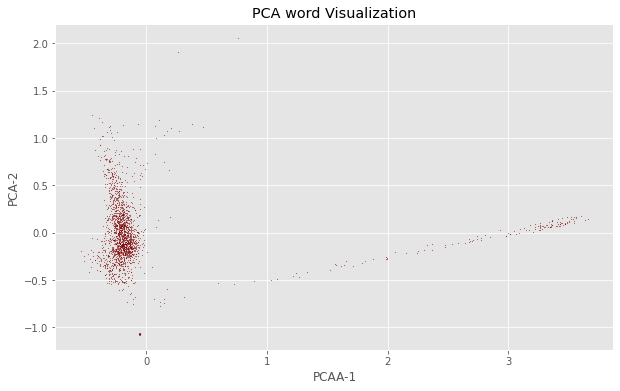

In [14]:
plt.clf()
fig = plt.figure(figsize=(10, 6))
plt.scatter(x = embedded_pca["X"],y = embedded_pca["Y"], s = 0.4, color = "maroon", alpha = 0.5)
plt.xlabel("PCAA-1")
plt.ylabel("PCA-2")
plt.title("PCA word Visualization")
plt.plot()